In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import string
import datetime

In [2]:
df = pd.read_csv('../../data/math_geneology_final.csv')
#df = df.head(500)
df = df.fillna(' ')

In [3]:
len(df)

271433

In [4]:
for col in ['student_school','advisor_school']:
    df[col] = df[col].str.strip()

In [5]:
df.head()

,Unnamed: 0,id,student_id,student_name,student_school,student_year,student_descendants,advisor_name,advisor_school,advisor_year
0,0,233136,233138,"Mogstad, Magne",Universitetet i Oslo,2008,1,"Aaberge, Rolf",Universitetet i Oslo,1976
1,1,13670,106100,"Anagnostakis, Christopher",Yale University,1984,,"Aaboe, Asger",Brown University,1957
2,2,13670,122878,"Britton, John",Yale University,1966,,"Aaboe, Asger",Brown University,1957
3,3,13670,122880,"Slotsky, Alice",Yale University,1992,1,"Aaboe, Asger",Brown University,1957
4,4,13670,122881,"Swerdlow, Noel",Yale University,1968,,"Aaboe, Asger",Brown University,1957


In [6]:
df_school_exists = df[(df.student_school != "") & (df.advisor_school != "")]

In [7]:
df.student_year.value_counts()

2012           8058
2013           7955
2011           7870
2014           7819
2010           7793
               ... 
1585, 1589        1
1926 (1882)       1
1567              1
1967, 1976        1
1960-1961         1
Name: student_year, Length: 621, dtype: int64

In [8]:
df_year = df_school_exists[df_school_exists.student_year == "2012"]

### Nodes
Nodes are schools (student and advisors) identified by name

In [9]:
schools_df = pd.concat([df_year[[c]].rename(columns = {c: "school"}) for c in ["student_school", "advisor_school"]]).drop_duplicates()

In [10]:
len(schools_df)

1165

In [11]:
school_digraph = nx.DiGraph()

In [12]:
school_digraph.add_nodes_from(schools_df.school.values)

### Edges
Edges connect advisor and student schools and are weighted by the number of advisor-students

In [13]:
edges_df = df_year.groupby(["student_school", "advisor_school"], as_index = False).agg({"student_id": "count"})

In [14]:
len(edges_df)

4565

In [15]:
edges = [(e["advisor_school"], e["student_school"], {"weight": e["student_id"]}) for e in edges_df.to_dict(orient = "records")]

In [16]:
school_digraph.add_edges_from(edges)

### Analysis

In [17]:
# Degree Centrality

cent = nx.degree_centrality(school_digraph)
df_cent = pd.DataFrame(pd.Series(cent))
df_cent.sort_values(0,ascending=False).head(10)

,0
"University of California, Berkeley",0.117698
Massachusetts Institute of Technology,0.116838
Princeton University,0.085052
Stanford University,0.079038
University of Wisconsin-Madison,0.077320
Harvard University,0.076460
University of Oxford,0.073024
University of Illinois at Urbana-Champaign,0.073024
Cornell University,0.068729
University of Cambridge,0.064433


In [18]:
# Out-Degree Centrality

cent = nx.out_degree_centrality(school_digraph)
df_cent = pd.DataFrame(pd.Series(cent))
df_cent.sort_values(0,ascending=False).head(10)

,0
Massachusetts Institute of Technology,0.088488
"University of California, Berkeley",0.087629
Princeton University,0.065292
Harvard University,0.062715
Stanford University,0.060997
University of Wisconsin-Madison,0.057560
University of Oxford,0.054124
Cornell University,0.051546
University of Cambridge,0.048969
University of Illinois at Urbana-Champaign,0.047251


In [19]:
# In-Degree Centrality

cent = nx.in_degree_centrality(school_digraph)
df_cent = pd.DataFrame(pd.Series(cent))
df_cent.sort_values(0,ascending=False).head(10)

,0
"University of California, Berkeley",0.030069
Technische Universität Kaiserslautern,0.029210
ETH Zürich,0.028351
Massachusetts Institute of Technology,0.028351
University of Michigan,0.026632
University of Illinois at Urbana-Champaign,0.025773
Texas A&M University,0.024055
Georgia Institute of Technology,0.023196
Purdue University,0.022337
North Carolina State University,0.021478


### Plotting

In [20]:
import matplotlib.pyplot as plt

In [21]:
%matplotlib inline

In [22]:
a = nx.kamada_kawai_layout(school_digraph)

In [27]:
a[list(a.keys())[0]]

array([0.36374765, 0.18933005])

In [35]:
[e for e in school_digraph.edges][:10]

[('University of South Australia', 'Academia Sinica'),
 ('University of South Australia', 'Université de Nice-Sophia Antipolis'),
 ('Massachusetts Institute of Technology', 'Aarhus University'),
 ('Massachusetts Institute of Technology', 'Australian National University'),
 ('Massachusetts Institute of Technology', 'Baylor University'),
 ('Massachusetts Institute of Technology', 'Boston University'),
 ('Massachusetts Institute of Technology', 'Brandeis University'),
 ('Massachusetts Institute of Technology', 'Brown University'),
 ('Massachusetts Institute of Technology',
  'California Institute of Technology'),
 ('Massachusetts Institute of Technology', 'Carnegie Mellon University')]

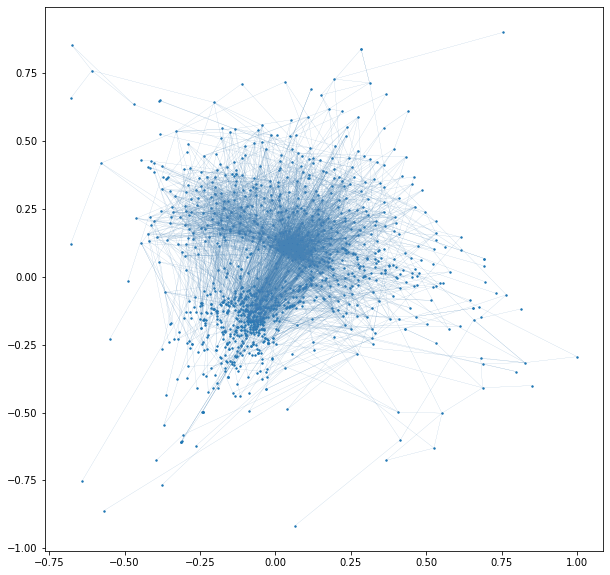

In [45]:
fig, ax = plt.subplots(figsize = (10, 10))
ax.scatter([v[0] for k, v in a.items()], [v[1] for k, v in a.items()], s = 2)
for e in [e for e in school_digraph.edges]:
    ax.plot([a[i][0] for i in e], [a[i][1] for i in e], c = "steelblue", lw = 0.1)